# Volatility
- Different ways to look at it
- Here we will use: Average True Range (ATR)

### What is Volatility?
- Volatility has a number of different meanings
- We use it in relation to price movement
- Can be thought as the equivalent as risk

### Resourses
- Volatility https://www.investopedia.com/terms/v/volatility.asp
- Average True Range https://www.investopedia.com/terms/a/atr.asp
- Matplotlib http://matplotlib.org (https://youtu.be/2ywUfs0rgtU)

In [3]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [4]:
start = dt.datetime(2022, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,609.989990,590.559998,605.609985,597.369995,3067500,597.369995
2022-01-04,600.409973,581.599976,599.909973,591.150024,4393100,591.150024
2022-01-05,592.840027,566.880005,592.000000,567.520020,4148700,567.520020
2022-01-06,563.359985,542.010010,554.340027,553.289978,5711800,553.289978
2022-01-07,553.429993,538.219971,549.460022,541.059998,3381700,541.059998


### Formula
$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close


In [6]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [7]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [9]:
true_range = np.max(df , axis=1)
print(true_range)

Date
2022-01-03     19.429993
2022-01-04     18.809998
2022-01-05     25.960022
2022-01-06     25.510010
2022-01-07     15.210022
2022-01-10     17.369995
2022-01-11     13.839966
2022-01-12     12.250000
2022-01-13     22.529968
2022-01-14     26.489990
2022-01-18     17.010010
2022-01-19     12.700012
2022-01-20     19.710022
2022-01-21    128.260010
2022-01-24     46.040009
2022-01-25     22.579987
2022-01-26     26.040009
2022-01-27     35.099976
2022-01-28     14.920013
2022-01-31     43.340027
2022-02-01     32.940002
2022-02-02     30.649994
2022-02-03     25.200012
2022-02-04     16.129974
2022-02-07     18.800018
2022-02-08     10.779999
2022-02-09     14.190002
2022-02-10     16.530029
2022-02-11     23.959991
2022-02-14     22.469971
2022-02-15     12.589996
2022-02-16     17.079987
2022-02-17     13.409973
2022-02-18     16.199982
2022-02-22     19.400024
2022-02-23     19.339996
2022-02-24     36.010010
2022-02-25     15.710022
2022-02-28     15.619995
2022-03-01     11.29

In [10]:
average_true_range = true_range.rolling(14).mean()

In [13]:
average_true_range

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
2022-01-10          NaN
2022-01-11          NaN
2022-01-12          NaN
2022-01-13          NaN
2022-01-14          NaN
2022-01-18          NaN
2022-01-19          NaN
2022-01-20          NaN
2022-01-21    26.791430
2022-01-24    28.692145
2022-01-25    28.961430
2022-01-26    28.967143
2022-01-27    29.652141
2022-01-28    29.631426
2022-01-31    31.486428
2022-02-01    32.850717
2022-02-02    34.165002
2022-02-03    34.355719
2022-02-04    33.615718
2022-02-07    33.743576
2022-02-08    33.606432
2022-02-09    33.212145
2022-02-10    25.231432
2022-02-11    23.654288
2022-02-14    23.646430
2022-02-15    22.685715
2022-02-16    21.398573
2022-02-17    21.290713
2022-02-18    19.352138
2022-02-22    18.384997
2022-02-23    17.577140
2022-02-24    18.349282
2022-02-25    18.319286
2022-02-28    18.092141
2022-03-01    18.128571
2022-03-02    18.115714
2022-03-03 

In [11]:
true_range.rolling(14).sum()/14

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
2022-01-10          NaN
2022-01-11          NaN
2022-01-12          NaN
2022-01-13          NaN
2022-01-14          NaN
2022-01-18          NaN
2022-01-19          NaN
2022-01-20          NaN
2022-01-21    26.791430
2022-01-24    28.692145
2022-01-25    28.961430
2022-01-26    28.967143
2022-01-27    29.652141
2022-01-28    29.631426
2022-01-31    31.486428
2022-02-01    32.850717
2022-02-02    34.165002
2022-02-03    34.355719
2022-02-04    33.615718
2022-02-07    33.743576
2022-02-08    33.606432
2022-02-09    33.212145
2022-02-10    25.231432
2022-02-11    23.654288
2022-02-14    23.646430
2022-02-15    22.685715
2022-02-16    21.398573
2022-02-17    21.290713
2022-02-18    19.352138
2022-02-22    18.384997
2022-02-23    17.577140
2022-02-24    18.349282
2022-02-25    18.319286
2022-02-28    18.092141
2022-03-01    18.128571
2022-03-02    18.115714
2022-03-03 

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


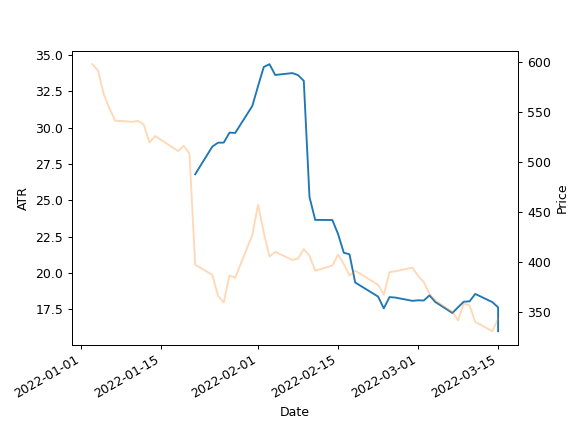

Text(0, 0.5, 'Price')

In [13]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")